# Get Data for Israel Covid-19 Cases

In [94]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

israel = data.iloc[136, 4:]
dates = data.columns[4:]
print(len(dates))

# 2/21/2020 - first case - index = 30


98


# Plot the cases

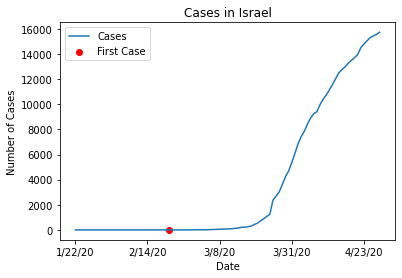

In [95]:
import matplotlib.pyplot as plt

plt.plot(dates, israel, label='Cases')
plt.scatter(dates[30], israel[30], color='r', label='First Case')
plt.legend(loc='upper left')
plt.xticks(dates[0::23])
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Cases in Israel')
plt.show()

# Import numpy

In [96]:
import numpy as np

# Create SIR function in 3 parts

# 'first' function - the case matrix at the first case

In [97]:
def first(case_mat, start_day, first_case, population):
    
    i = 0
    while(i < start_day):
        case_mat[i] = [population, 0, 0]
        i += 1
    
    case_mat[start_day] = [population - first_case, first_case, 0] 
    
    return case_mat

# Update for one day

In [98]:
def update(mat, start_day, population, infec_rate, rec_rate):
    
    for i in range(start_day+1, len(mat)):
        
       # update number of Susceptibe Today
       mat[i, 0] = mat[i-1, 0] - infec_rate * (mat[i-1, 0]/population) * (mat[i-1, 1])

       # Update number of Infected Today
       mat[i, 1] = mat[i-1, 1] + infec_rate * (mat[i-1, 0]/population) * (mat[i-1, 1]) - rec_rate * (mat[i-1,1])

       # Update number of Recovered Today
       mat[i, 2] = mat[i-1, 2] + rec_rate * (mat[i-1, 1])
        
    return mat

# Repeat the update

In [99]:
def seq(start_day, total_days, first_case, population, infec_rate, rec_rate):
    # create the cases matrix
    case_mat = np.zeros((total_days, 3))
    
    # update case_mat up to first case (included)
    case_mat = first(case_mat, start_day, first_case, population)
    
    # update case_mat up to end_day
    case_mat = update(case_mat, start_day, population, infec_rate, rec_rate)
    
    return case_mat

# Run the SIR function

In [100]:
# First case - day 30 (a month after 1/22/20 was Israel's first case)
# Make a matrix of length 365 [Susceptilbe, Infected, Recovered/Removed]
# The first case is one person
# Israel population 9,512,000
# Infection rate 0.5
# Average Recovery Time - 8 days


israel_sir = seq(30, 365, 1, 9152000, 0.5, 1/8)

# I know the infection rate & recovery time are very conservative, but the model still returns
# a very quick infection of about 4 million in about 2 weeks...

# Create datetime series of whole year from 1/22/2020

In [101]:
from datetime import date

year = pd.date_range(start='1/22/20', end='1/20/21')
len(year)

365

# Plot the SIR model

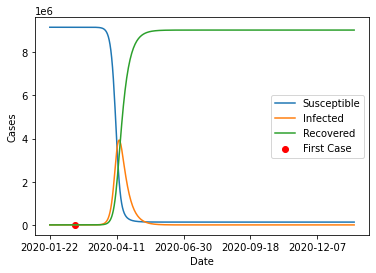

In [93]:
plt.plot(year, israel_sir[:,0], label='Susceptible')
plt.plot(year, israel_sir[:,1], label='Infected')
plt.plot(year, israel_sir[:,2], label='Recovered')
plt.scatter(year[30], israel_sir[30,2], color='r', label='First Case')
plt.xticks(year[0::80])
plt.legend(loc='center right')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()